# Plotting all

[      0     100     200 ... 2999700 2999800 2999900]
[2000.  2001.  2000.5 ... 2034.5 2033.  2033.5]
[2000.         1999.2745098  1998.98387097 ... 1833.50943396 1838.50909091
 1839.5       ]


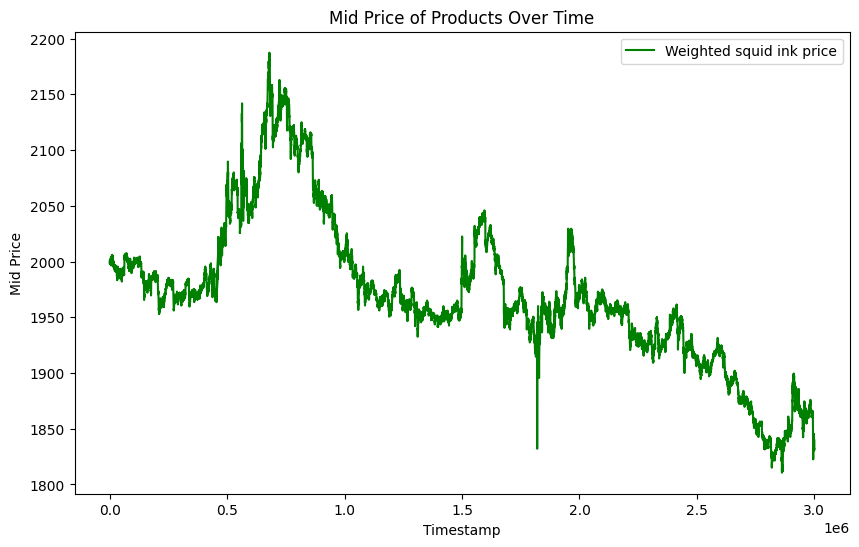

Mean Squared Error: 0.2851745327623144


In [2]:
import pandas as pd
import numpy as np

prices1 = pd.read_csv(r'./round-1-island-data-bottle/round-1-island-data-bottle/prices_round_1_day_-2.csv',sep=';')
prices2 = pd.read_csv(r'./round-1-island-data-bottle/round-1-island-data-bottle/prices_round_1_day_-1.csv',sep=';')
prices3 = pd.read_csv(r'./round-1-island-data-bottle/round-1-island-data-bottle/prices_round_1_day_0.csv',sep=';')

import matplotlib.pyplot as plt
# Concatenate all dataframes
all_prices = pd.concat([prices1, prices2, prices3])
all_prices['timestamp'] = all_prices['timestamp']+(1000000*(all_prices['day']+2))

kelp_data = all_prices[all_prices['product'] == 'KELP']
kelp_x = kelp_data['timestamp'].to_numpy()
kelp_y = kelp_data['mid_price'].to_numpy()
kelp_z1 = kelp_data['bid_price_1'].to_numpy()
kelp_z2 = kelp_data['bid_price_2'].to_numpy()
kelp_z3 = kelp_data['bid_price_3'].to_numpy()
kelp_w1 = kelp_data['ask_price_1'].to_numpy()
kelp_w2 = kelp_data['ask_price_2'].to_numpy()
kelp_w3 = kelp_data['ask_price_3'].to_numpy()
print(kelp_x)
print(kelp_y)

resin_data = all_prices[all_prices['product'] == 'RAINFOREST_RESIN']
resin_x = resin_data['timestamp'].to_numpy()
resin_y = resin_data['mid_price'].to_numpy()
resin_z1 = resin_data['bid_price_1'].to_numpy()
resin_z2 = resin_data['bid_price_2'].to_numpy()
resin_z3 = resin_data['bid_price_3'].to_numpy()
resin_w1 = resin_data['ask_price_1'].to_numpy()
resin_w2 = resin_data['ask_price_2'].to_numpy()
resin_w3 = resin_data['ask_price_3'].to_numpy()

squid_ink_data = all_prices[all_prices['product'] == 'SQUID_INK']
squid_ink_x = squid_ink_data['timestamp'].to_numpy()
squid_ink_y = squid_ink_data['mid_price'].to_numpy()
squid_ink_z1 = squid_ink_data['bid_price_1'].to_numpy()
squid_ink_z2 = squid_ink_data['bid_price_2'].to_numpy()
squid_ink_z3 = squid_ink_data['bid_price_3'].to_numpy()

squid_ink_w1 = squid_ink_data['ask_price_1'].to_numpy()
squid_ink_w2 = squid_ink_data['ask_price_2'].to_numpy()
squid_ink_w3 = squid_ink_data['ask_price_3'].to_numpy()
squid_ink_a1 = squid_ink_data['ask_volume_1'].to_numpy()
squid_ink_a2 = squid_ink_data['ask_volume_2'].to_numpy()
squid_ink_a3 = squid_ink_data['ask_volume_3'].to_numpy()
squid_ink_b1 = squid_ink_data['bid_volume_1'].to_numpy()
squid_ink_b2 = squid_ink_data['bid_volume_2'].to_numpy()
squid_ink_b3 = squid_ink_data['bid_volume_3'].to_numpy()
# Calculate weighted average price for squid ink using both bid and ask prices
# Handle any potential division by zero with np.nan_to_num
squid_ink_z1 = np.nan_to_num(squid_ink_z1, nan=0.0)
squid_ink_z2 = np.nan_to_num(squid_ink_z2, nan=0.0)
squid_ink_z3 = np.nan_to_num(squid_ink_z3, nan=0.0)
squid_ink_b1 = np.nan_to_num(squid_ink_b1, nan=0.0)
squid_ink_b2 = np.nan_to_num(squid_ink_b2, nan=0.0)
squid_ink_b3 = np.nan_to_num(squid_ink_b3, nan=0.0)
squid_ink_a1 = np.nan_to_num(squid_ink_a1, nan=0.0)
squid_ink_a2 = np.nan_to_num(squid_ink_a2, nan=0.0)
squid_ink_a3 = np.nan_to_num(squid_ink_a3, nan=0.0)
squid_ink_w1 = np.nan_to_num(squid_ink_w1, nan=0.0)
squid_ink_w2 = np.nan_to_num(squid_ink_w2, nan=0.0)
squid_ink_w3 = np.nan_to_num(squid_ink_w3, nan=0.0)


squid_ink_weighted_mean = (
    (squid_ink_z1 * squid_ink_b1 + squid_ink_z2 * squid_ink_b2 + squid_ink_z3 * squid_ink_b3 + squid_ink_a1*squid_ink_w1 + squid_ink_a2*squid_ink_w2 + squid_ink_a3*squid_ink_w3) /
    (squid_ink_b1 + squid_ink_b2 + squid_ink_b3 + squid_ink_a1 + squid_ink_a2 + squid_ink_a3)
)

print(squid_ink_weighted_mean)


plt.figure(figsize=(10, 6))
# plt.plot(kelp_x, kelp_y, label='Kelp', color='green')
# plt.plot(resin_x, resin_y, label='Rainforest Resin', color='blue')
# plt.plot(squid_ink_x, squid_ink_y, label='Squid Ink', color='purple')
plt.plot(squid_ink_x, squid_ink_weighted_mean, label='Weighted squid ink price', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.title('Mid Price of Products Over Time')
plt.legend()
plt.show()

mse = np.mean((squid_ink_weighted_mean - squid_ink_y) ** 2)
print(f'Mean Squared Error: {mse}')

# print(all_prices.head(6))


# Fourier transform

In [11]:
# N_fft = 2048
# x = squid_ink_y

# X_fft = np.fft.fft(x, N_fft)
# freq_fft = np.fft.fftfreq(N_fft, d=1)


# omega = np.linspace(-np.pi, np.pi, N_fft)
# X_dtft = np.array([sum(x[n] * np.exp(-1j * w * n) for n in range(len(x))) for w in omega])


# plt.figure(figsize=(12, 6))


# plt.subplot(2, 2, 1)
# plt.plot(omega, np.abs(X_dtft))
# plt.title("DTFT Magnitude")
# plt.xlabel("ω (radians/sample)")
# plt.ylabel("|X(e^{jω})|")
# plt.grid()


# plt.subplot(2, 2, 2)
# plt.plot(omega, np.angle(X_dtft))
# plt.title("DTFT Phase")
# plt.xlabel("ω (radians/sample)")
# plt.ylabel("∠X(e^{jω})")
# plt.grid()


# plt.subplot(2, 2, 3)
# plt.plot(freq_fft, np.abs(X_fft))
# plt.title("FFT Magnitude")
# plt.xlabel("Normalized Frequency")
# plt.ylabel("|X[k]|")
# plt.grid()


# plt.subplot(2, 2, 4)
# plt.plot(freq_fft, np.angle(X_fft))
# plt.title("FFT Phase")
# plt.xlabel("Normalized Frequency")
# plt.ylabel("∠X[k]")
# plt.grid()

# plt.tight_layout()
# plt.show()


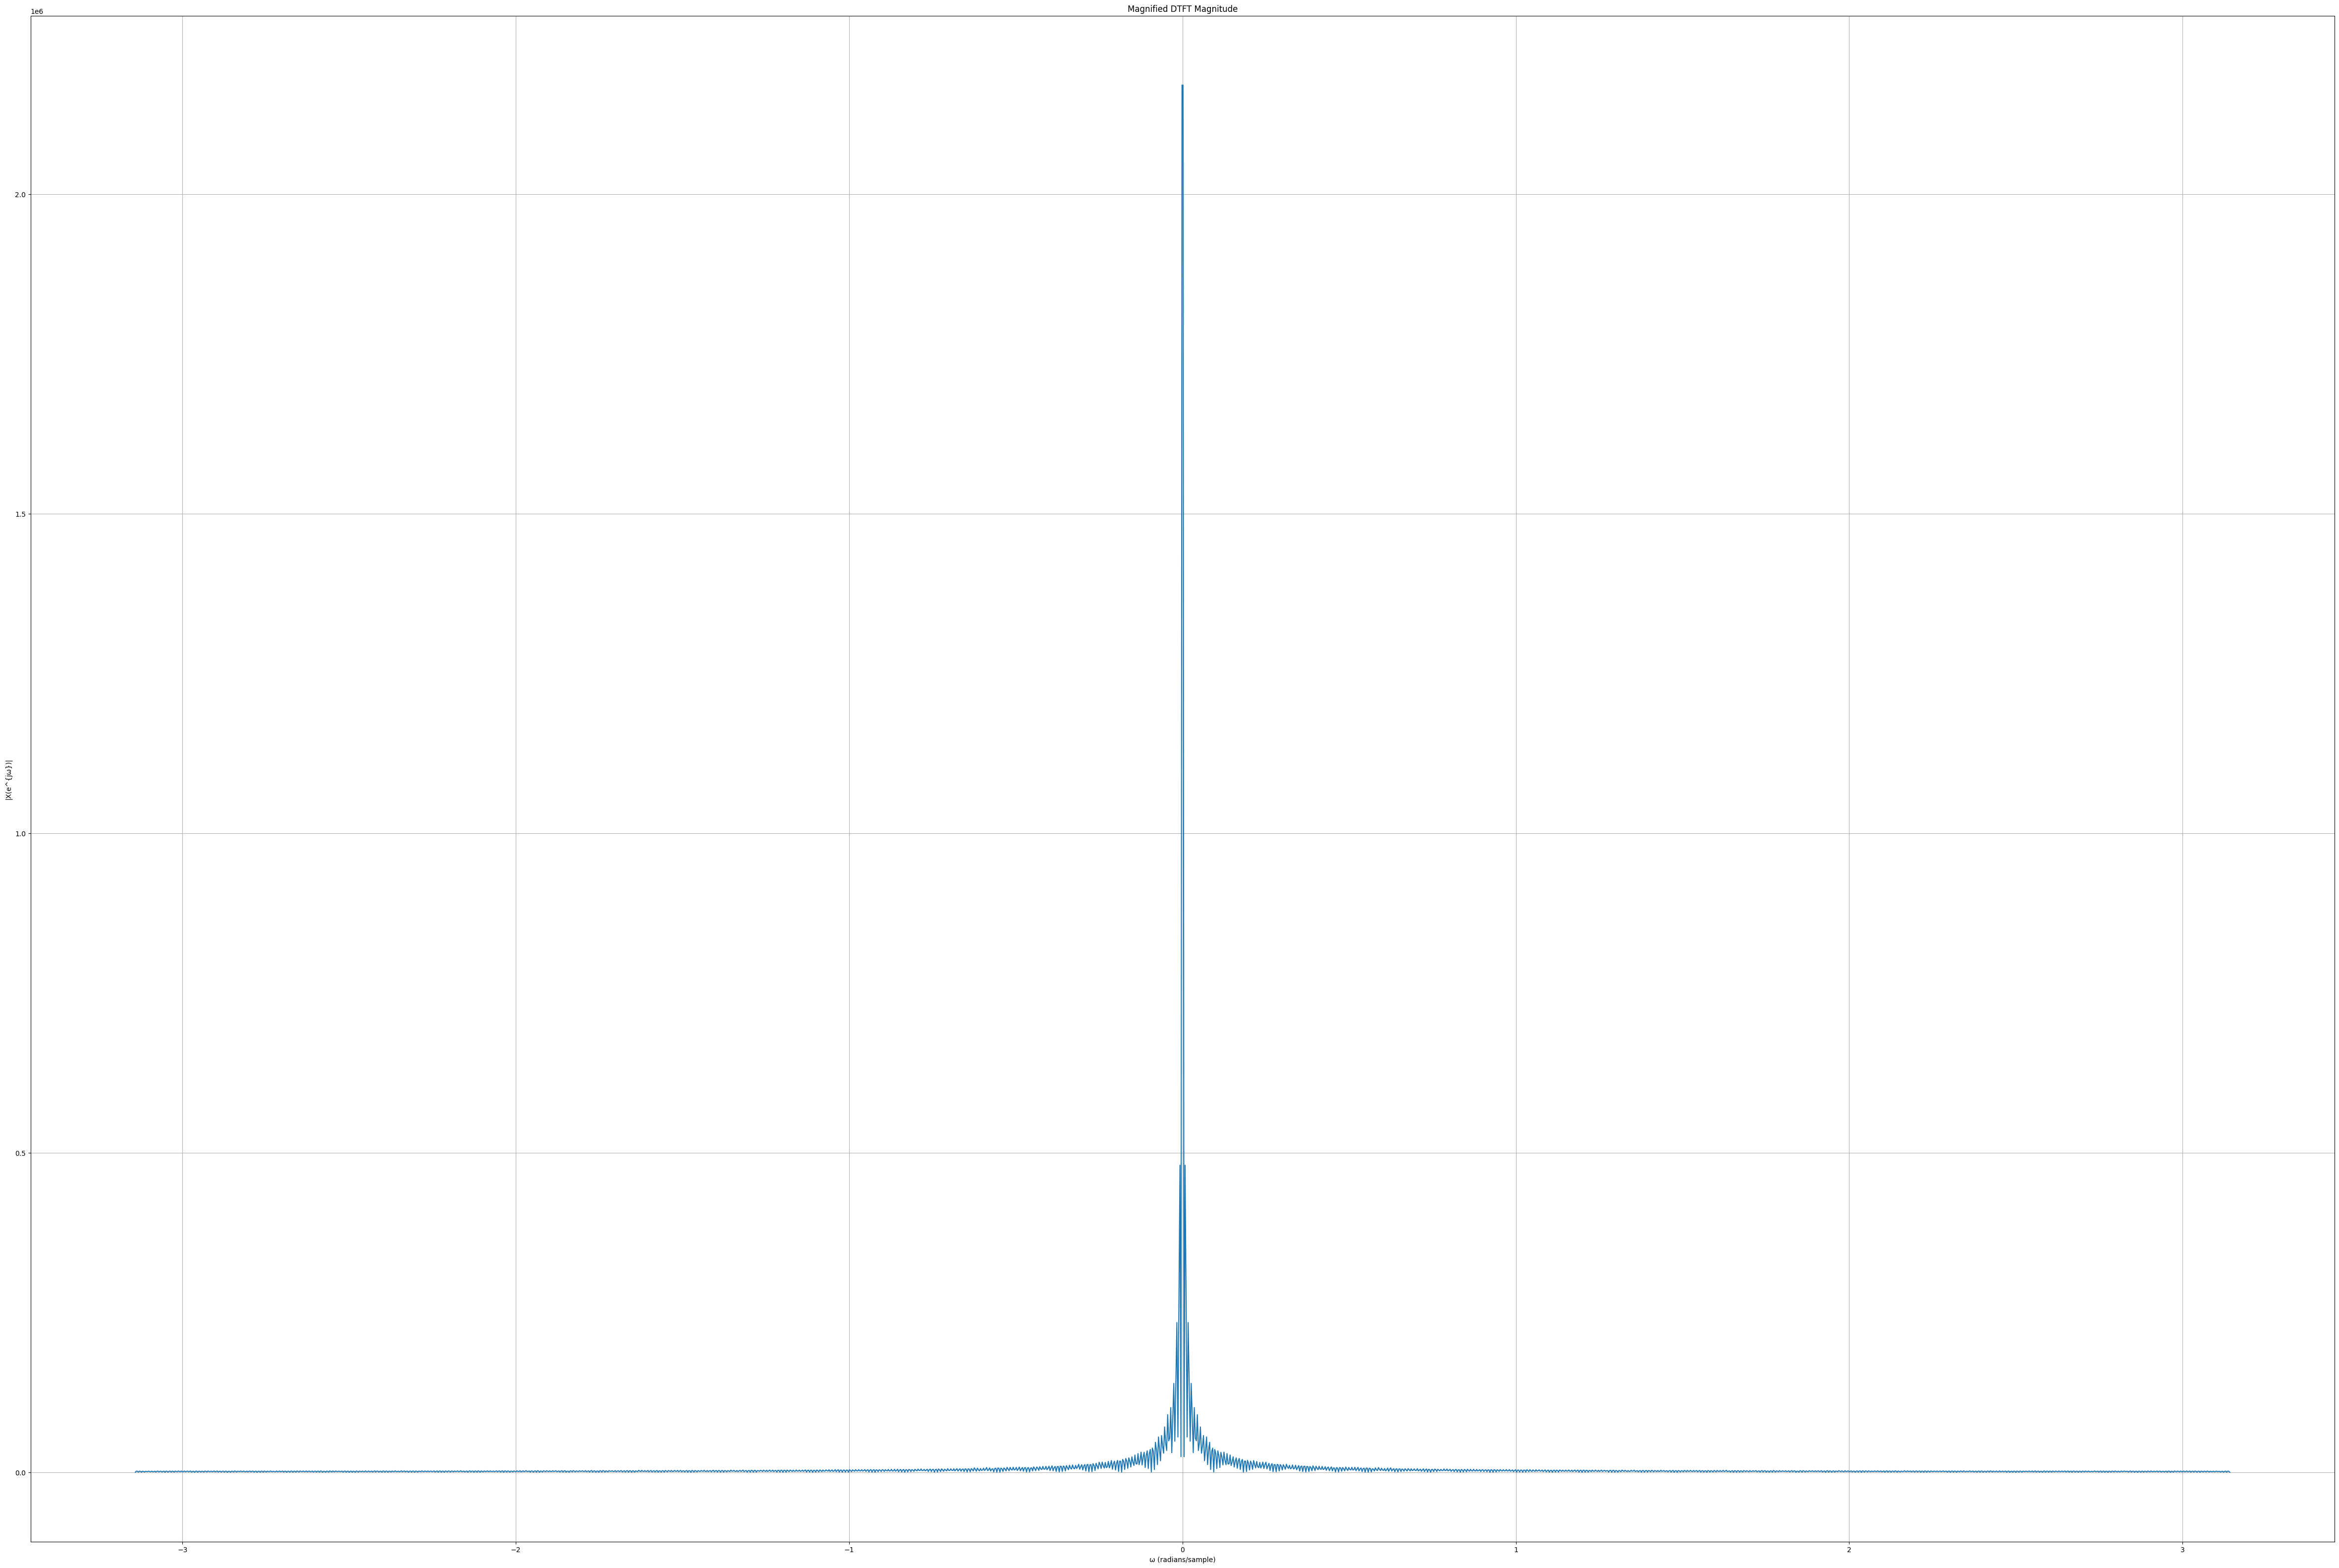

In [12]:
# plt.plot(omega, np.abs(X_dtft))
plt.figure(figsize=(60, 40))  # Adjust the figure size to magnify the image
plt.plot(omega, np.abs(X_dtft))
plt.title("Magnified DTFT Magnitude")
plt.xlabel("ω (radians/sample)")
plt.ylabel("|X(e^{jω})|")
plt.grid()
plt.show()

# Polynomial regression

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

X, y = [], []








n = 7                                 ################################################## MAY CHANGE THIS

degree = 3                            ################################################## MAY CHANGE THIS


data = squid_ink_y
for i in range(n,len(data)):
    X.append(data[i-n:i])
    y.append(data[i])

X = np.array(X)
y = np.array(y)

split_index = int(0.55 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train the autoregressive model
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit your model
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

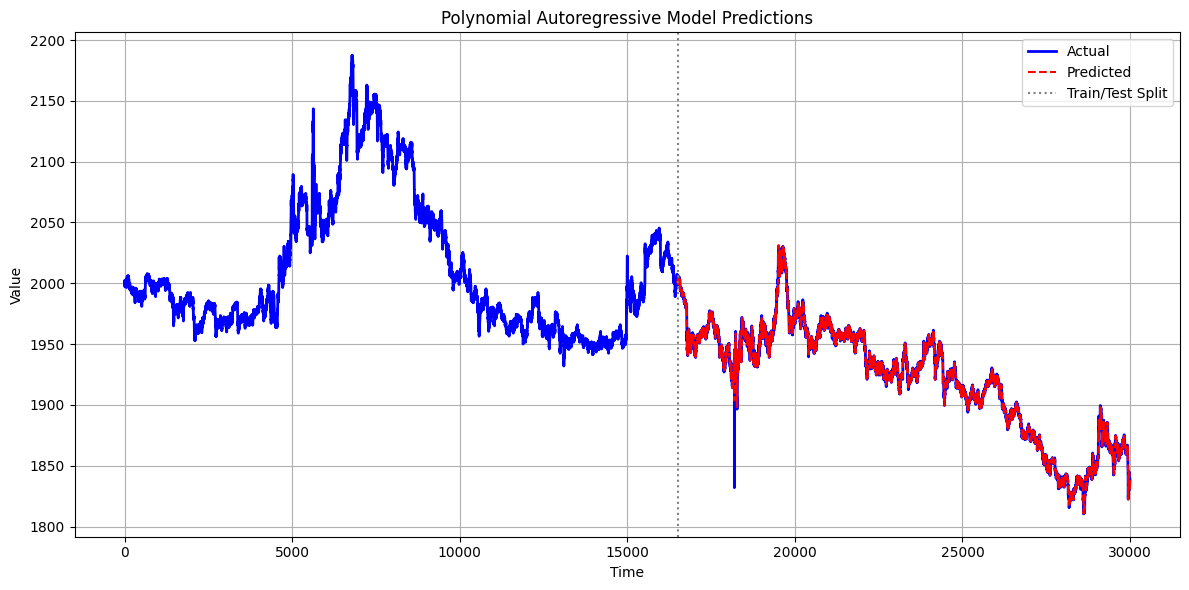

In [4]:
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Write outputs to a file
with open("output.txt", "w") as f:
    f.write(f"Mean Squared Error: {mse}\n")
    f.write("Model Coefficients:\n")
    for coef in model.named_steps['linearregression'].coef_:
        f.write(f"{coef}\n")
    f.write(f"Model Intercept: {model.named_steps['linearregression'].intercept_}\n")
    f.write("Model Polynomial Features:\n")
    for powers in model.named_steps['polynomialfeatures'].powers_:
        f.write(f"{powers}\n")


# Plotting
plt.figure(figsize=(12, 6))
plt.plot(range(len(y)), y, label="Actual", color='blue', linewidth=2)
plt.plot(range(split_index, len(y)), y_pred, label="Predicted", color='red', linestyle='--')
plt.axvline(x=split_index, color='gray', linestyle=':', label='Train/Test Split')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Polynomial Autoregressive Model Predictions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Figuring out parameters

In [15]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import mean_squared_error

# import matplotlib.pyplot as plt

# X, y = [], []






# min_mse = float('inf')


# for n in range(2,11):
#     for degree in range(1,6):
#         X, y = [], []
#         data = squid_ink_y
#         for i in range(n,len(data)):
#             X.append(data[i-n:i])
#             y.append(data[i])

#         X = np.array(X)
#         y = np.array(y)

#         split_index = int(0.30 * len(X))
#         X_train, X_test = X[:split_index], X[split_index:]
#         y_train, y_test = y[:split_index], y[split_index:]

#         # Train the autoregressive model
#         model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

#         # Fit your model
#         model.fit(X, y)

#         # Predict on test data
#         y_pred = model.predict(X_test)

#         # Calculate Mean Squared Error
#         mse = mean_squared_error(y_test, y_pred)

#         # Write outputs to a file
#         with open("output.txt", "a") as f:
#             f.write(f"Mean Squared Error: {mse}\n")
#             if mse < min_mse:
#                 min_mse = mse
#                 print(f"New minimum MSE found: {mse} with n={n} and degree={degree}")
#             f.write("Model Coefficients:\n")
#             for coef in model.named_steps['linearregression'].coef_:
#                 f.write(f"{coef}\n")
#             f.write(f"Model Intercept: {model.named_steps['linearregression'].intercept_}\n")
#             f.write("Model Polynomial Features:\n")
#             for powers in model.named_steps['polynomialfeatures'].powers_:
#                 f.write(f"{powers}\n")


#         # Plotting
#         plt.figure(figsize=(12, 6))
#         plt.plot(range(len(y)), y, label="Actual", color='blue', linewidth=2)
#         plt.plot(range(split_index, len(y)), y_pred, label="Predicted", color='red', linestyle='--')
#         plt.axvline(x=split_index, color='gray', linestyle=':', label='Train/Test Split')
#         plt.xlabel("Time")
#         plt.ylabel("Value")
#         plt.title("Polynomial Autoregressive Model Predictions")
#         plt.legend()
#         plt.grid(True)
#         plt.tight_layout()
#         plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import pandas as pd

# Use your existing numpy arrays
# squid_ink_x: [0, 100, 200, ..., 2999900]
# squid_ink_y: [2000., 2001., 2000.5, ..., 2033.5]

# Convert to pandas Series with numeric index
series = pd.Series(squid_ink_y, index=squid_ink_x)

# STL decomposition with guessed period (try 500, 1000, 2000 etc.)
period = 1000  # ← change this to explore nested cycles
stl = STL(series, period=period, robust=True)
result = stl.fit()

# Plot the decomposition
fig, axs = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

axs[0].plot(series, label='Original', color='black')
axs[0].legend(loc='upper left')
axs[0].set_ylabel('Value')

axs[1].plot(result.trend, label='Trend', color='blue')
axs[1].legend(loc='upper left')
axs[1].set_ylabel('Trend')

axs[2].plot(result.seasonal, label='Seasonal', color='green')
axs[2].legend(loc='upper left')
axs[2].set_ylabel('Seasonal')

axs[3].plot(result.resid, label='Residual', color='red')
axs[3].legend(loc='upper left')
axs[3].set_ylabel('Residual')
axs[3].set_xlabel('Time')

plt.suptitle(f'STL Decomposition (period = {period})', fontsize=16)
plt.tight_layout()
plt.show()


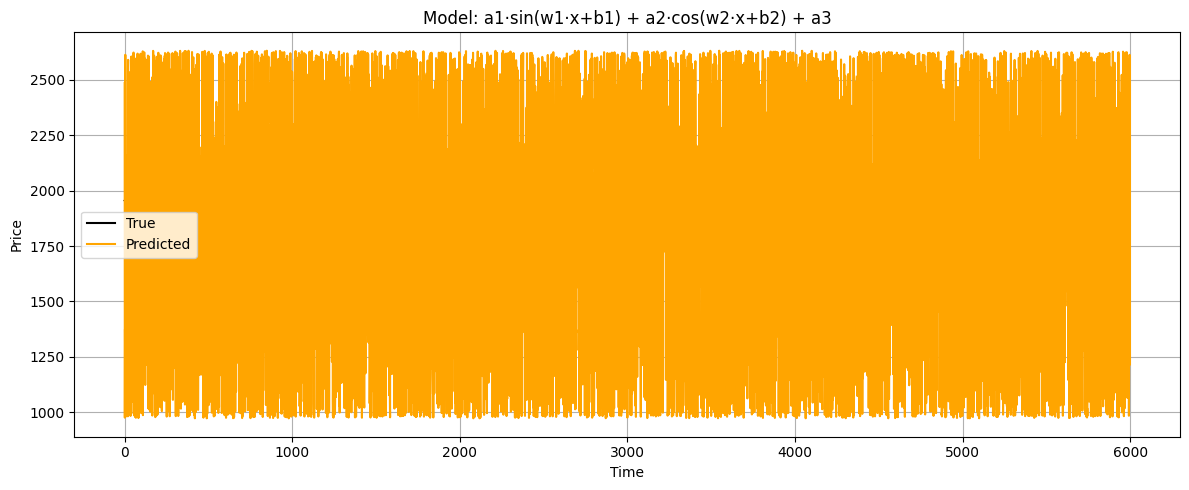

a1, a2, a3: [-824.88324139   -5.17779647 1801.93495868]
w1: [  81.42090768   31.35512459   92.70825619    1.28488259 -206.85458986] b1: 1.090307722825725
w2: [ 2.57920997 -1.45200462  9.23855974 -4.52108119  6.15609242] b2: -1.0323871863559189


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize

# Use your existing price series
y = squid_ink_y
window = 5

# Prepare lagged features (X) and target (y_target)
X = np.column_stack([y[i:-(window - i)] for i in range(window)])
y_target = y[window:]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.2, shuffle=False)

# Custom model: a1*sin(w1·x + b1) + a2*cos(w2·x + b2) + a3
def model(x, params):
    w1 = params[0:5]
    b1 = params[5]
    w2 = params[6:11]
    b2 = params[11]
    a1, a2, a3 = params[12], params[13], params[14]

    sin_term = np.sin(x @ w1 + b1)
    cos_term = np.cos(x @ w2 + b2)
    return a1 * sin_term + a2 * cos_term + a3

# Loss function: Mean Squared Error
def loss_fn(params):
    y_pred = model(X_train, params)
    return np.mean((y_train - y_pred) ** 2)

# Initialize params (15 total): w1[5], b1, w2[5], b2, a1, a2, a3
init_params = np.random.randn(15)

# Optimize
res = minimize(loss_fn, init_params, method='L-BFGS-B')
opt_params = res.x

# Predict on test set
y_pred_test = model(X_test, opt_params)

# Plot results
plt.figure(figsize=(12, 5))
plt.plot(y_test, label='True', color='black')
plt.plot(y_pred_test, label='Predicted', color='orange')
plt.title("Model: a1·sin(w1·x+b1) + a2·cos(w2·x+b2) + a3")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print learned parameters
print("a1, a2, a3:", opt_params[12:15])
print("w1:", opt_params[0:5], "b1:", opt_params[5])
print("w2:", opt_params[6:11], "b2:", opt_params[11])


In [38]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute metrics on test set
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("🔍 Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Print learned parameters again for clarity
print("\n🧠 Learned Parameters:")
print(f"a1 = {opt_params[12]:.4f}, a2 = {opt_params[13]:.4f}, a3 = {opt_params[14]:.4f}")
print(f"w1 = {opt_params[0:5]}")
print(f"b1 = {opt_params[5]:.4f}")
print(f"w2 = {opt_params[6:11]}")
print(f"b2 = {opt_params[11]:.4f}")


🔍 Evaluation Metrics:
Mean Squared Error (MSE): 13551.4913
R² Score: -10.2672

🧠 Learned Parameters:
a1 = -1.6992, a2 = 2.2288, a3 = 1993.3922
w1 = [ -9.47304499 -28.56786308   8.52794716  24.3782072   17.2749234 ]
b1 = 1.6372
w2 = [ 1.78749303  0.10172149  1.58913276 -0.22899174 -2.03658639]
b2 = -2.5249


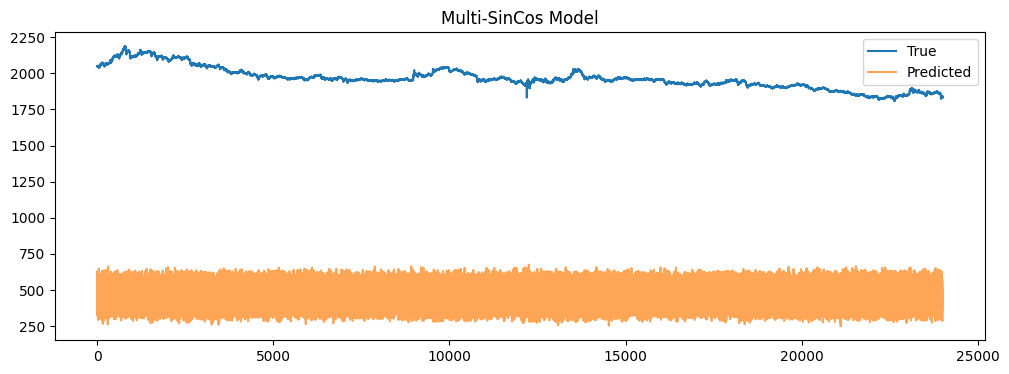

In [40]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def multi_sin_cos_model(X, params, n_terms=3):
    pred = np.zeros(X.shape[0])
    for i in range(n_terms):
        w_sin = params[i*5:(i+1)*5]
        b_sin = params[n_terms*5 + i]
        w_cos = params[(n_terms+i)*5:(n_terms+i+1)*5]
        b_cos = params[n_terms*5 + n_terms + i]
        a_sin = params[-2*n_terms-1+i]
        a_cos = params[-n_terms-1+i]
        pred += a_sin * np.sin(X @ w_sin + b_sin) + a_cos * np.cos(X @ w_cos + b_cos)
    return pred + params[-1]  # bias

def make_dataset(y, window=5):
    X = np.column_stack([y[i:-(window - i)] for i in range(window)])
    y_target = y[window:]
    return X, y_target

X, y_target = make_dataset(squid_ink_y, window=5)
X_train, y_train = X[:6000], y_target[:6000]
X_test, y_test = X[6000:], y_target[6000:]

n_terms = 10
param_count = 2 * n_terms * 5 + 2 * n_terms + 1
init_params = np.random.randn(param_count)

def loss(params): return np.mean((multi_sin_cos_model(X_train, params, n_terms) - y_train) ** 2)

res = minimize(loss, init_params, method='L-BFGS-B')
y_pred = multi_sin_cos_model(X_test, res.x, n_terms)

plt.figure(figsize=(12, 4))
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.legend(); plt.title("Multi-SinCos Model"); plt.show()


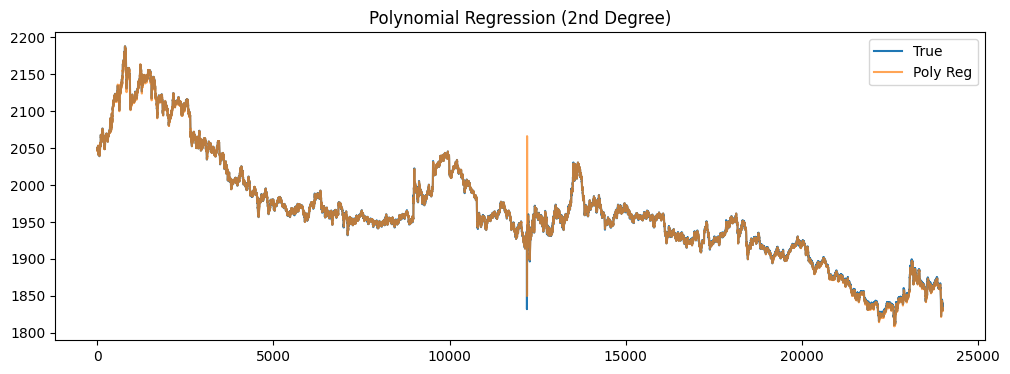

🔍 Evaluation Metrics for Polynomial Regression:
Mean Squared Error (MSE): 4.3393
R² Score: 0.9992


In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

reg = LinearRegression().fit(X_poly, y_train)
y_pred_poly = reg.predict(X_poly_test)

plt.figure(figsize=(12, 4))
plt.plot(y_test, label='True')
plt.plot(y_pred_poly, label='Poly Reg', alpha=0.7)
plt.legend(); plt.title("Polynomial Regression (2nd Degree)"); plt.show()
from sklearn.metrics import mean_squared_error, r2_score
# Compute metrics on test set
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("🔍 Evaluation Metrics for Polynomial Regression:")
print(f"Mean Squared Error (MSE): {mse_poly:.4f}")
print(f"R² Score: {r2_poly:.4f}")

In [20]:
split_index = int(0.40 * len(X))
X_train, y_train = X[:split_index], y_target[:split_index]
X_test, y_test = X[split_index:], y_target[split_index:]

In [ ]:
from pyESN import ESN

esn = ESN(n_inputs=10, n_outputs=1, n_reservoir=200, spectral_radius=1.8, sparsity=0.3, random_state=42)

# Train the ESN and discard the predictions returned by fit
esn.fit(X_train, y_train)

# Then make predictions separately
y_pred_esn = esn.predict(X_test)

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(y_test, label='True')
plt.plot(y_pred_esn, label='ESN Predicted', alpha=0.7)
plt.legend()
plt.title("Echo State Network")
plt.show()


ValueError: shapes (200,10) and (5,) not aligned: 10 (dim 1) != 5 (dim 0)

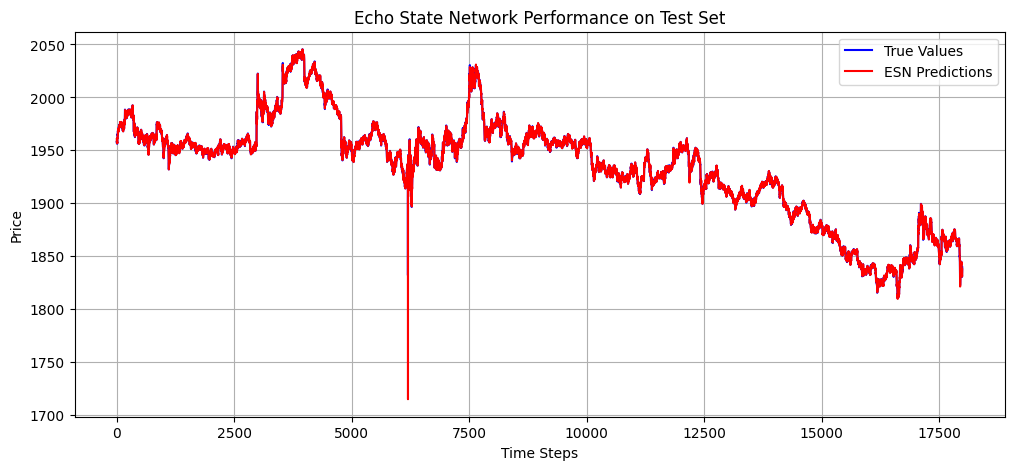

🔍 Evaluation Metrics for ESN:
Mean Squared Error (MSE): 4.9907
R² Score: 0.9978


In [22]:
from sklearn.metrics import mean_squared_error, r2_score
import pickle
# Plot the ESN predictions vs actual values
plt.figure(figsize=(12, 5))
plt.plot(y_test, label='True Values', color='blue')
plt.plot(y_pred_esn, label='ESN Predictions', color='red')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.title('Echo State Network Performance on Test Set')
plt.legend()
plt.grid(True)
plt.show()

# Save the trained model
with open('esn_model.pkl', 'wb') as f:
    pickle.dump(esn, f)
mse = mean_squared_error(y_test, y_pred_esn)
r2 = r2_score(y_test, y_pred_esn)
print("🔍 Evaluation Metrics for ESN:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

In [18]:
import pickle
import numpy as np

# Load the saved ESN model
with open('esn_model.pkl', 'rb') as f:
    loaded_esn = pickle.load(f)

# Function to make a prediction using the last 5 values
def predict_next_value(last_five_values):
    # Reshape input to match what the model expects
    input_data = np.array(last_five_values).reshape(1, -1)
    
    # Make prediction
    prediction = loaded_esn.predict(input_data)
    
    # Return the scalar prediction value
    return prediction[0][0]

# Example: Past 5 values from the squid_ink_y series
last_five_values = [1831.5, 1833.0, 1834.5, 1838.0, 1839.5]

# Get prediction for the next value
next_value = predict_next_value(last_five_values)

print(f"Last 5 values: {last_five_values}")
print(f"Predicted next value: {next_value:.2f}")

Last 5 values: [1831.5, 1833.0, 1834.5, 1838.0, 1839.5]
Predicted next value: 2073.51


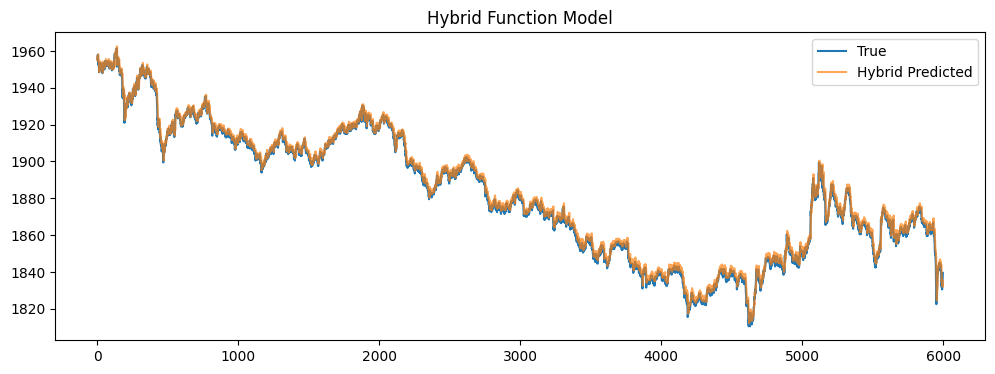

In [ ]:


def hybrid_model(X, params):
    a1, a2, a3, b1, b2, b3 = params[:6]
    poly = a1 * X[:, 0]**2 + a2 * X[:, 1]**2 + a3 * X[:, 2]
    trig = b1 * np.sin(X @ np.ones(5)) + b2 * np.cos(X @ np.ones(5)) + b3
    return poly + trig

init_params = np.random.randn(6)
def loss_hybrid(p): return np.mean((hybrid_model(X_train, p) - y_train)**2)

res = minimize(loss_hybrid, init_params, method='L-BFGS-B')
y_pred_hybrid = hybrid_model(X_test, res.x)

plt.figure(figsize=(12, 4))
plt.plot(y_test, label='True')
plt.plot(y_pred_hybrid, label='Hybrid Predicted', alpha=0.7)
plt.legend(); plt.title("Hybrid Function Model"); plt.show()


In [68]:
mse = mean_squared_error(y_test, y_pred_hybrid)
r2 = r2_score(y_test, y_pred_hybrid)
print("🔍 Evaluation Metrics for Hybrid Model:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

🔍 Evaluation Metrics for Hybrid Model:
Mean Squared Error (MSE): 6.4274
R² Score: 0.9947


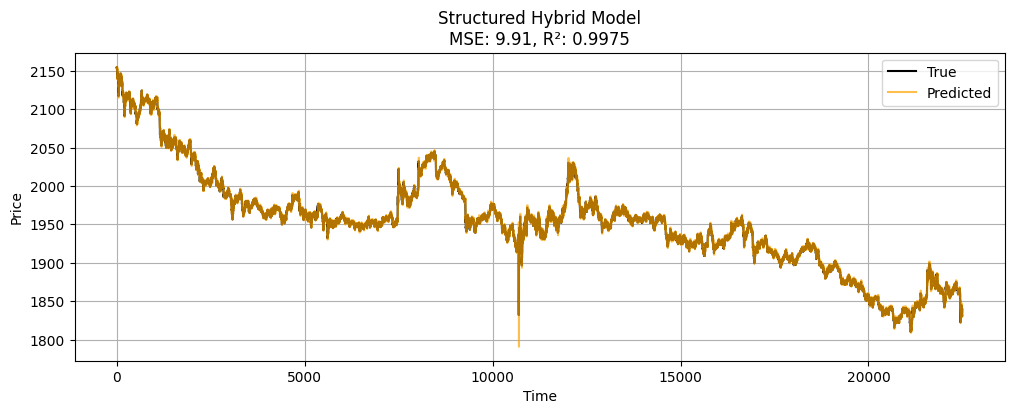


🧠 Learned Parameters:
w1 (sin): [-0.3439 -0.4501 -0.5442  1.7462 -1.9044]
b1: [-1.008]
w2 (cos): [ 0.2401 -1.3593  0.1866 -0.0865 -0.8329]
b2: [1.9283]
w_poly: [ 0.4436  0.5323 -1.6945  0.5529  1.2577]
w_lin: [-0.3155  1.1907 -0.146   0.2232 -0.1299]
a1: [-0.3163]
a2: [-0.4497]
a3: [-0.]
a4: [1.2188]
b3: [-0.1096]


In [19]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


# ---- Dataset ----
def make_dataset(y, window=5):
    X = np.column_stack([y[i:-(window - i)] for i in range(window)])
    y_target = y[window:]
    return X, y_target

X, y_target = make_dataset(squid_ink_y, window=5)
split_index = int(0.25 * len(X))
X_train, y_train = X[:split_index], y_target[:split_index]
X_test, y_test = X[split_index:], y_target[split_index:]

# ---- Hybrid Model: sin(ar1) + cos(ar2) + poly(x) + linear(x) + bias ----
def hybrid_model_structured(X, params):
    w1 = params[0:5]       # For sin
    b1 = params[5]
    w2 = params[6:11]      # For cos
    b2 = params[11]
    w_poly = params[12:17] # For quadratic
    w_lin = params[17:22]  # For linear
    a1, a2, a3, a4, b3 = params[22:]  # scales + bias

    ar1 = X @ w1 + b1
    ar2 = X @ w2 + b2
    poly = np.sum(w_poly * (X ** 2), axis=1)
    linear = X @ w_lin

    return a1 * np.sin(ar1) + a2 * np.cos(ar2) + a3 * poly + a4 * linear + b3

# ---- Loss ----
def loss(p): return np.mean((hybrid_model_structured(X_train, p) - y_train) ** 2)

# ---- Training ----
init_params = np.random.randn(27)  # 5+1 + 5+1 + 5 + 5 + 5 scalars = 27
res = minimize(loss, init_params, method='L-BFGS-B')

# ---- Prediction ----
y_pred = hybrid_model_structured(X_test, res.x)

# ---- Evaluation ----
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(12, 4))
plt.plot(y_test, label='True', color='black')
plt.plot(y_pred, label='Predicted', color='orange', alpha=0.7)
plt.title(f"Structured Hybrid Model\nMSE: {mse:.2f}, R²: {r2:.4f}")
plt.xlabel("Time"); plt.ylabel("Price")
plt.legend(); plt.grid(True); plt.show()

# ---- Optional: Parameters ----
print("\n🧠 Learned Parameters:")
labels = ['w1 (sin)', 'b1', 'w2 (cos)', 'b2', 'w_poly', 'w_lin', 'a1', 'a2', 'a3', 'a4', 'b3']
split_sizes = [5, 1, 5, 1, 5, 5, 1, 1, 1, 1, 1]
slices = np.split(res.x, np.cumsum(split_sizes)[:-1])
for name, val in zip(labels, slices):
    print(f"{name}: {np.round(val, 4)}")


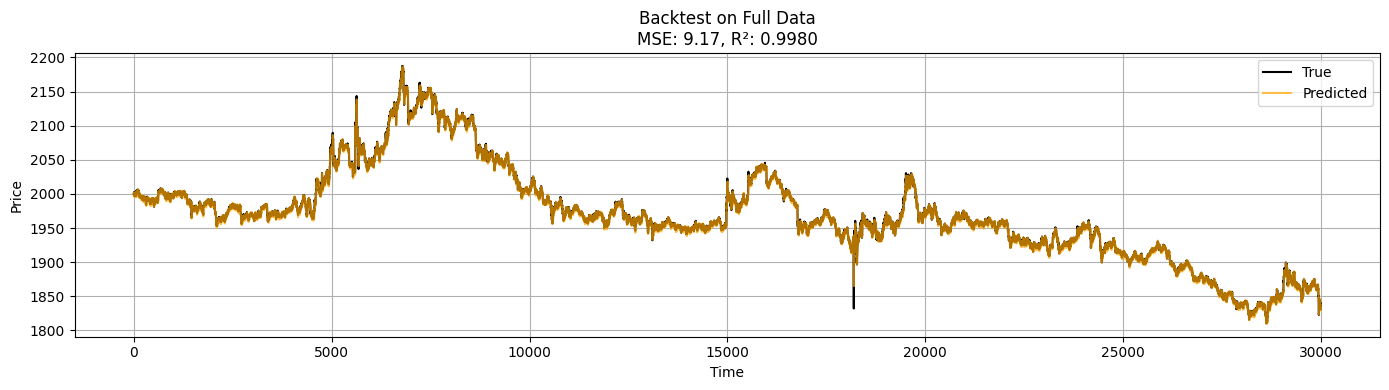

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 🧠 Hardcoded Learned Parameters
w1 = np.array([ 0.8648, -1.2013, -0.3355, -0.4759, -0.6543])
b1 = 1.7655
w2 = np.array([ 0.4051, -1.2607,  0.918,   2.1223,  1.0326])
b2 = -1.5194
w_poly = np.array([-0.2899,  0.9455, -0.6922,  0.0407,  0.0888])
w_lin = np.array([-0.9071, -0.0398, -3.2213, -1.0045, -0.2326])
a1 = -1.2478
a2 = 1.6324
a3 = 0.0
a4 = -0.1849
b3 = 0.1307

# Use the full squid_ink_y array
y = squid_ink_y
window = 5
predictions = []

# Loop through data starting from `window` index
for i in range(window, len(y)):
    x = y[i - window:i]  # past 5 values

    ar1 = np.dot(w1, x) + b1
    ar2 = np.dot(w2, x) + b2
    poly = np.sum(w_poly * (x ** 2))
    linear = np.dot(w_lin, x)

    pred = a1 * np.sin(ar1) + a2 * np.cos(ar2) + a3 * poly + a4 * linear + b3
    predictions.append(pred)

# Align true values with predictions
true_values = y[window:]
predictions = np.array(predictions)

# 📉 Evaluation
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(true_values, predictions)
r2 = r2_score(true_values, predictions)

# 📊 Plotting
plt.figure(figsize=(14, 4))
plt.plot(true_values, label="True", color='black')
plt.plot(predictions, label="Predicted", color='orange', alpha=0.7)
plt.title(f"Backtest on Full Data\nMSE: {mse:.2f}, R²: {r2:.4f}")
plt.xlabel("Time"); plt.ylabel("Price")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()
